In [1]:
%config InlineBackend.figure_format = 'retina'

Looking for help? Visit the ESTYP documentation: https://estyp.readthedocs.io/


Normality tests results:
- Residuals appear as normally distributed according to KS test (p-value = 0.974).
- Residuals appear as normally distributed according to Shapiro-Wilk test (p-value = 0.616).
- Residuals appear as normally distributed according to Jarque-Bera test (p-value = 0.496).
- Residuals appear as normally distributed according to Omni test (p-value = 0.471).


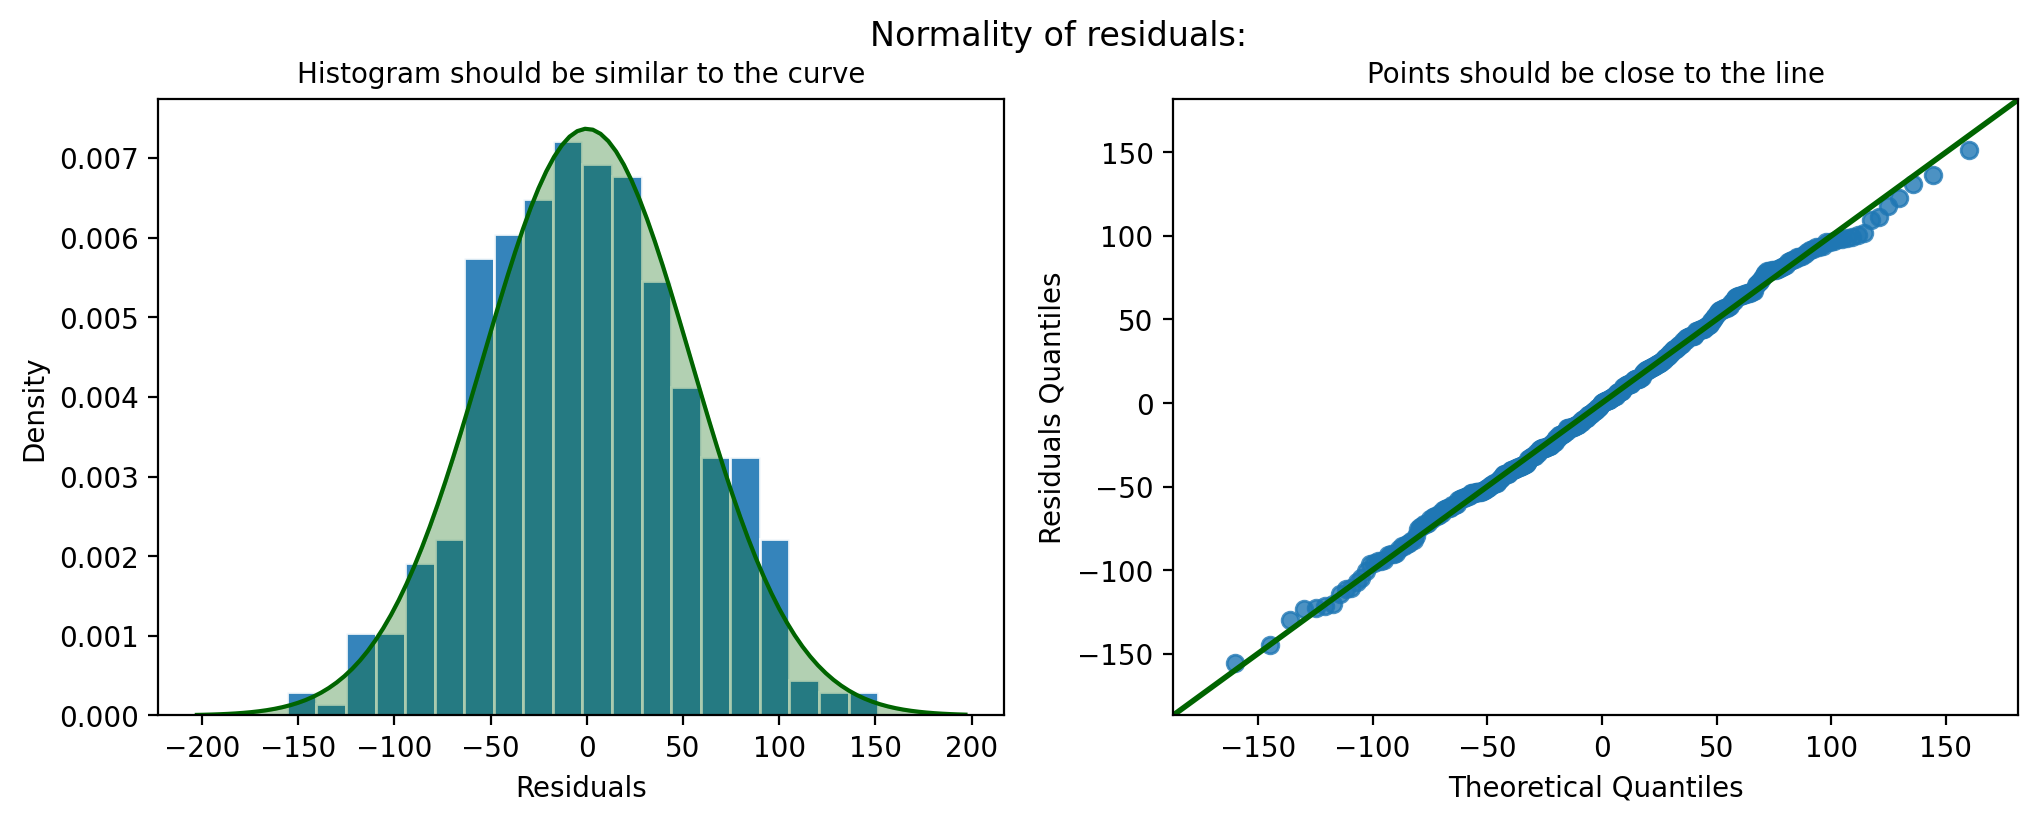

Homocedasticity tests results:
- Heteroscedasticity (non-constant error variance) detected according to Breusch-Pagan test (p-value = 0.003).
- Heteroscedasticity (non-constant error variance) detected according to White test (p-value = 0.012).
- Error variance appears to be homoscedastic according to Goldfeld-Quandt test (p-value = 0.595).


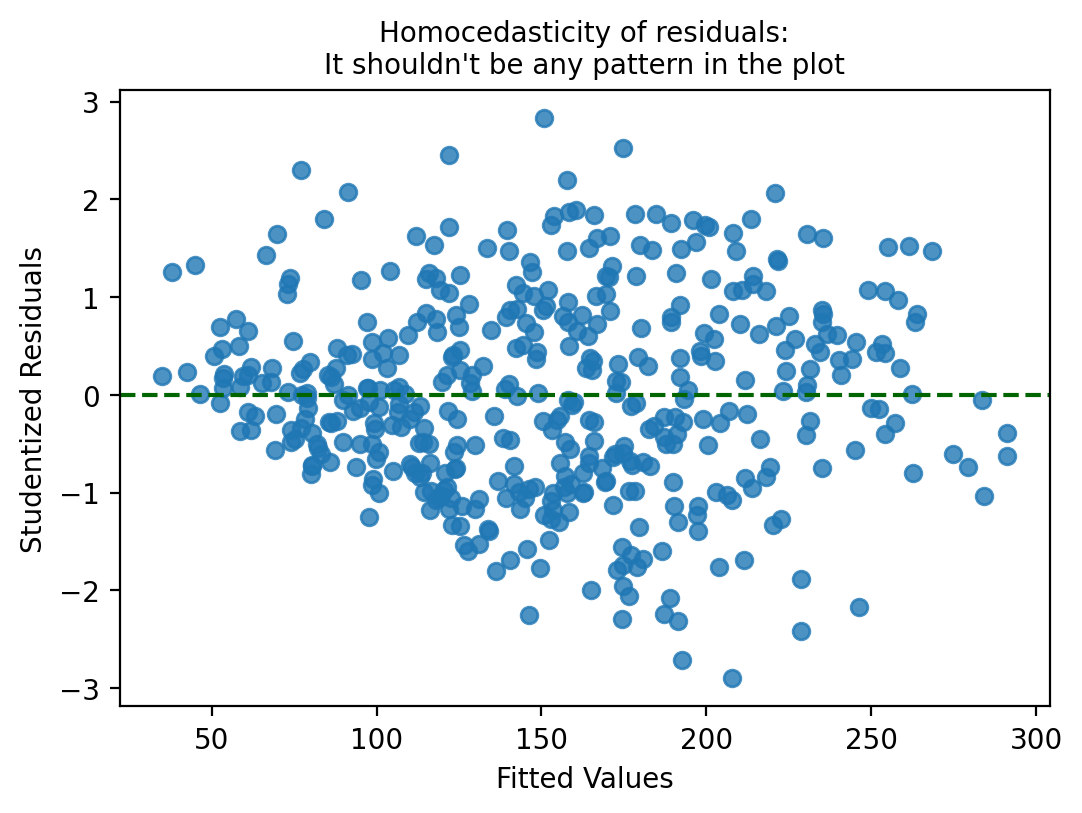

Independence tests results:
- Residuals appear to be independent and not autocorrelated according to DW test (DW-Statistic = 2.029)
- Residuals appear to be independent and not autocorrelated according to Box-Pierce test (p-value = 0.351).
- Residuals appear to be independent and not autocorrelated according to Breusch-Godfrey test (p-value = 0.184).


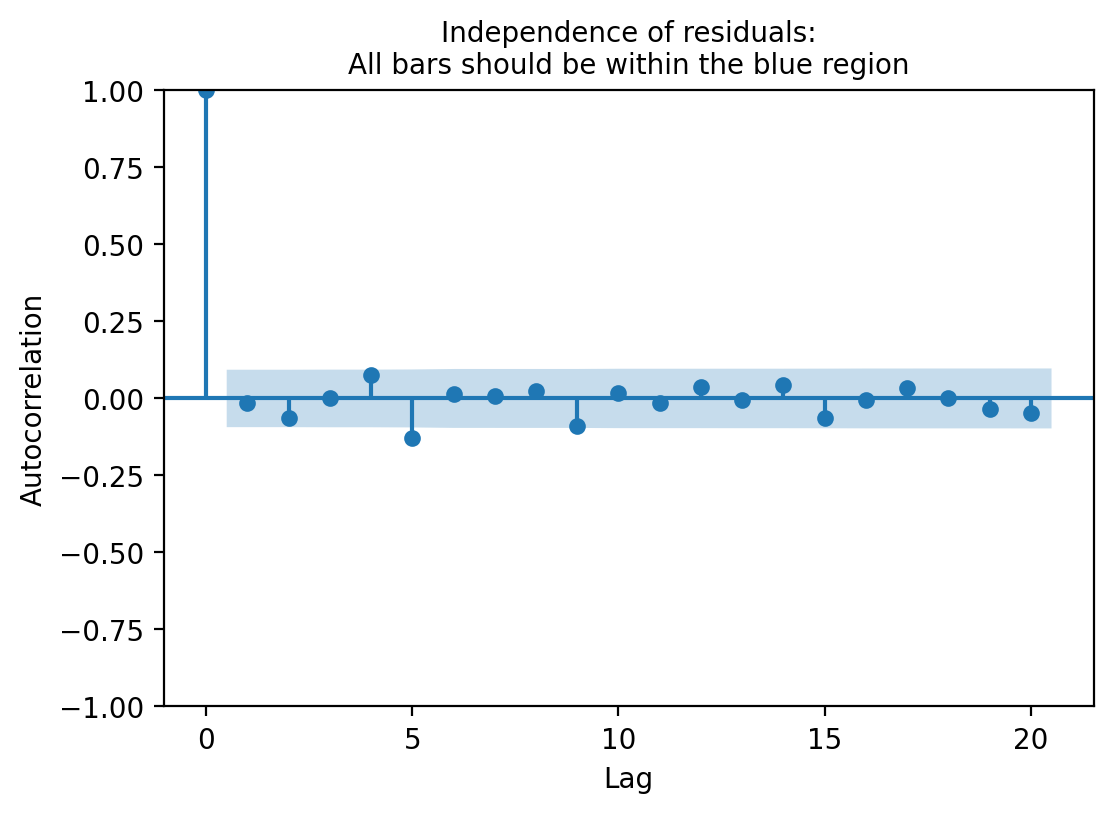

Multicollinearity test results:
- The model may have multicollinearity problems (condition number = 227.22).


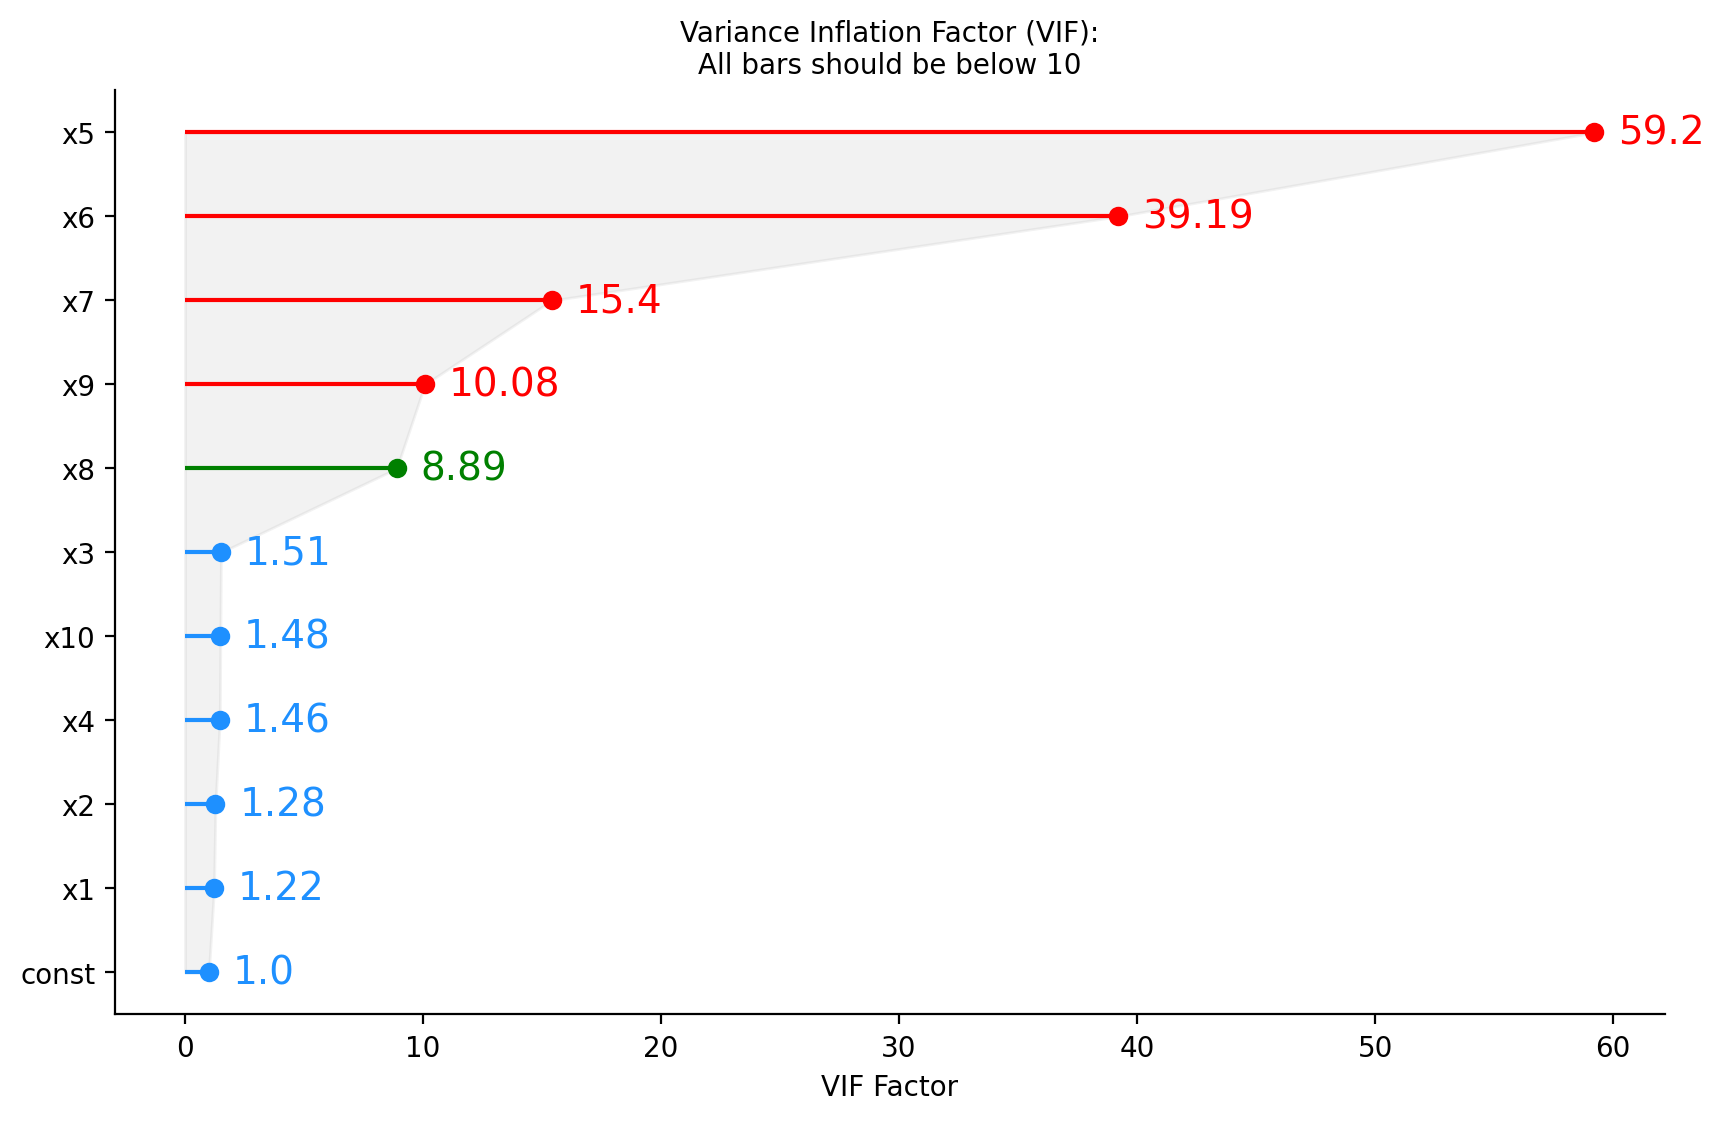

In [2]:
import statsmodels.api as sm
from sklearn.datasets import load_diabetes
from estyp.testing import CheckModel

diabetes = load_diabetes()
X = diabetes["data"]
y = diabetes["target"]
X = sm.add_constant(X)
model = sm.OLS(y, X)
fitted_model = model.fit()
cm = CheckModel(fitted_model)
cm.check_all()

In [3]:
import numpy as np
from estyp.testing import var_test

np.random.seed(2023)
x = np.random.normal(size=100)
y = np.random.normal(size=100)

print("1 - F Test for Two Samples")
print(var_test(x, y))
print("2 - F Test for Two Samples changing alternative hypothesis")
print(var_test(x, y, alternative="less"))
print("3 - F Test for Two Samples changing ratio")
print(var_test(x, y, ratio=0.9, alternative="greater"))

1 - F Test for Two Samples

    F test to compare two variances
    F = 1.2805 | df: {'x': 99, 'y': 99} | p-value = 0.2205
    alternative hypothesis: true ratio of variances is not equal to 1
    95 percent confidence interval:
     0.861545 1.903058
    sample estimates:
      ratio of variances: 1.280457
    
2 - F Test for Two Samples changing alternative hypothesis

    F test to compare two variances
    F = 1.2805 | df: {'x': 99, 'y': 99} | p-value = 0.8898
    alternative hypothesis: true ratio of variances is less than 1
    95 percent confidence interval:
     0.000000 1.785035
    sample estimates:
      ratio of variances: 1.280457
    
3 - F Test for Two Samples changing ratio

    F test to compare two variances
    F = 1.4227 | df: {'x': 99, 'y': 99} | p-value = 0.0405
    alternative hypothesis: true ratio of variances is greater than 0.9
    95 percent confidence interval:
     0.918508 inf
    sample estimates:
      ratio of variances: 1.280457
    


In [4]:
import numpy as np
from estyp.testing import t_test

np.random.seed(2023)
x = np.random.normal(size=100)
y = np.random.normal(size=100)
mu = 0.1

print("1 - One Sample Test")
print(t_test(x, mu=mu, alternative="less"))
print("2 - Two Sample Test")
print(t_test(x, y, mu=mu))
print("3 - Two Sample Test with Equal Variances")
print(t_test(x, y, mu=mu, var_equal=True, alternative="greater"))
print("4 - Paired Test")
print(t_test(x, y, mu=mu, paired=True))

1 - One Sample Test

    One Sample t-test
    T = -1.3237 | df: 99 | p-value = 0.0943
    alternative hypothesis: true mean is less than 0.1
    95 percent confidence interval:
     -inf 0.138028
    sample estimates:
      mean of x: -0.049492
    
2 - Two Sample Test

    Welch's Two Sample t-test
    T = -1.2046 | df: 195.05 | p-value = 0.2298
    alternative hypothesis: true difference in means is not equal to 0.1
    95 percent confidence interval:
     -0.478794 0.115698
    sample estimates:
      [mean of x, mean of y]: [-0.049492, 0.032056]
    
3 - Two Sample Test with Equal Variances

    Two Sample t-test
    T = -1.2046 | df: 198 | p-value = 0.8851
    alternative hypothesis: true difference in means is greater than 0.1
    95 percent confidence interval:
     -0.430622 inf
    sample estimates:
      [mean of x, mean of y]: [-0.049492, 0.032056]
    
4 - Paired Test

    Paired t-test
    T = -1.2772 | df: 99 | p-value = 0.2045
    alternative hypothesis: true mean diffe

In [5]:
import pandas as pd
import statsmodels.api as sm
from estyp.testing import nested_models_test

data = pd.DataFrame({
    "x": [2.01, 2.99, 4.01, 5.01, 6.89],
    "y": [2, 3, 4, 5, 6]
})
model_small = sm.OLS.from_formula("y ~ 1", data).fit()
model_big = sm.OLS.from_formula("y ~ x", data).fit()
print(nested_models_test(model_small, model_big))


    Nested models F-test
    F = 134.2747 | df: {'df_num': 1, 'df_den': 3} | p-value = 0.0014
    alternative hypothesis: big model is true
    sample estimates:
      Difference in deviances between models: 9.781460
    


In [6]:
data = pd.DataFrame({
    "x": [2.01, 2.99, 4.01, 3.01, 4.89],
    "y": [0, 1, 1, 0, 1]
})
model_small = sm.Logit.from_formula("y ~ 1", data).fit()
model_big = sm.Logit.from_formula("y ~ x", data).fit()
print(nested_models_test(model_small, model_big))

Optimization terminated successfully.
         Current function value: 0.673012
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.290002
         Iterations 10

    Nested models F-test
    F = 3.9621 | df: {'df_num': 1, 'df_den': 3} | p-value = 0.1406
    alternative hypothesis: big model is true
    sample estimates:
      Difference in deviances between models: 3.830096
    


In [7]:
data = pd.DataFrame({
    "x": [2.01, 2.99, 4.01, 5.01, 6.89],
    "y": [2, 3, 4, 5, 6]
})
model_small = sm.GLM.from_formula("y ~ 1", data, family = sm.families.Gamma()).fit()
model_big = sm.GLM.from_formula("y ~ x", data, family = sm.families.Gamma()).fit()
print(nested_models_test(model_small, model_big))


    Nested models F-test
    F = 13.0985 | df: {'df_num': 1, 'df_den': 3} | p-value = 0.0363
    alternative hypothesis: big model is true
    sample estimates:
      Difference in deviances between models: 0.573166
    


/home/esteban/.local/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/esteban/.local/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


In [8]:
import numpy as np
from scipy import stats
from estyp.testing import prop_test

x = np.array([83, 90, 129, 70])
n = np.array([86, 93, 136, 82])
result = prop_test(x, n)
print(result)


    4-sample test for given proportions without continuity correction
    X-squared = 12.6004 | df: 3 | p-value = 0.0056
    alternative hypothesis: the true proportions are not all equal
    sample estimates:
      proportion(s): [0.965116, 0.967742, 0.948529, 0.853659]
    


In [9]:
from sklearn import datasets
from estyp.testing import cor_test

iris = datasets.load_iris()
sepal_length = iris.data[:, 0]
petal_length = iris.data[:, 2]

result = cor_test(sepal_length, petal_length, method="pearson")
print(result)


    Pearson's product-moment correlation
    t = 21.6460 | df: 148 | p-value = <0.0001
    alternative hypothesis: true correlation is not equal to 0
    95 percent confidence interval:
     0.827036 0.905508
    sample estimates:
      cor: 0.871754
    


In [10]:
from estyp.testing import chisq_test

M = [[762, 327, 468], [484, 239, 477]]
result1 = chisq_test(M)
print(result1)


    Pearson's Chi-squared test
    X-squared = 30.0701 | df: 2 | p-value = <0.0001
    alternative hypothesis: true frequencies are not equal to expected frequencies


In [11]:
x = [12, 5, 7, 7]
p = [0.4, 0.4, 0.2, 0.2]
result2 = chisq_test(x, p=p, rescale_p=True)
print(result2)


    Chi-squared test for given probabilities
    X-squared = 4.3226 | df: 3 | p-value = 0.2287
    alternative hypothesis: true frequencies are not equal to expected frequencies


In [12]:
x = [20, 15, 25]
result31 = chisq_test(x)
print(result31)


    Chi-squared test for given probabilities
    X-squared = 2.5000 | df: 2 | p-value = 0.2865
    alternative hypothesis: true frequencies are not equal to expected frequencies


In [13]:
x = [89,37,30,28,2]
p = [0.40,0.20,0.20,0.19,0.01]
result32 = chisq_test(x, p=p)
print(result32)


    Chi-squared test for given probabilities
    X-squared = 5.7947 | df: 4 | p-value = 0.2150
    alternative hypothesis: true frequencies are not equal to expected frequencies


/home/esteban/miniconda3/envs/estyp_dev/lib/python3.9/site-packages/estyp-0.7.0-py3.9.egg/estyp/testing/__base/__init__.py:855: UserWarning: Chi-squared approximation may be incorrect


In [14]:
x = [1, 2, 3, 4, 5, 6]
y = [6, 1, 2, 3, 4, 5]
result4 = chisq_test(x, y)
print(result4)


    Pearson's Chi-squared test
    X-squared = 30.0000 | df: 25 | p-value = 0.2243
    alternative hypothesis: true frequencies are not equal to expected frequencies
